# Illegal Mines Correlation

We are using a smaller data set that only contains few relevant features: income, lighting, deforestation, health and distance to the nearest large-scale mine.
Also the data in the above features is aggregated by year and latitude/longitude.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn
%matplotlib inline

In [2]:
# Dataset location
maindb = "short.csv"

# Read in a CSV file and store the contents in a dataframe (df)
df = pd.read_csv(maindb, low_memory=False, sep=',')
df.head()


,year,x,y,expenditure,income,ill_or_injured,malaria,forestloss,nightlights,distance_nearestlargemine
0,98.0,-3.05622,6.86144,679.86713,344.251040,0.295238,0.627282,0.0,0.00000,76552.820
1,98.0,-2.94462,6.35241,545.13544,514.467100,0.297297,0.628550,0.0,0.34153,69400.570
2,98.0,-2.85447,7.74937,709.71167,511.725740,0.265823,0.603990,0.0,0.00000,47839.813
3,98.0,-2.81880,10.72420,246.44479,85.705086,0.173913,0.553067,0.0,0.00000,245310.780
4,98.0,-2.81525,6.88833,1034.02030,826.393370,0.125000,0.620716,0.0,0.00000,49765.992


In [3]:
df.shape

(1593, 10)

,year,x,y,expenditure,income,ill_or_injured,malaria,forestloss,nightlights,distance_nearestlargemine
year,1.000000,-0.041613,0.140556,0.282040,0.210935,-0.279912,-0.345842,0.268879,-0.012088,0.122306
x,-0.041613,1.000000,-0.044612,0.044417,-0.032909,0.028370,-0.405654,-0.140034,0.130309,0.234926
y,0.140556,-0.044612,1.000000,-0.299556,-0.121485,-0.140273,0.349652,-0.301155,-0.314759,0.877439
expenditure,0.282040,0.044417,-0.299556,1.000000,0.556490,-0.058995,-0.496576,0.254737,0.526546,-0.238783
income,0.210935,-0.032909,-0.121485,0.556490,1.000000,-0.102473,-0.273329,0.221765,0.248368,-0.119854
ill_or_injured,-0.279912,0.028370,-0.140273,-0.058995,-0.102473,1.000000,0.148217,-0.096269,-0.105714,-0.135924
malaria,-0.345842,-0.405654,0.349652,-0.496576,-0.273329,0.148217,1.000000,-0.130625,-0.583006,0.246476
forestloss,0.268879,-0.140034,-0.301155,0.254737,0.221765,-0.096269,-0.130625,1.000000,0.039231,-0.311557
nightlights,-0.012088,0.130309,-0.314759,0.526546,0.248368,-0.105714,-0.583006,0.039231,1.000000,-0.218054
distance_nearestlargemine,0.122306,0.234926,0.877439,-0.238783,-0.119854,-0.135924,0.246476,-0.311557,-0.218054,1.000000


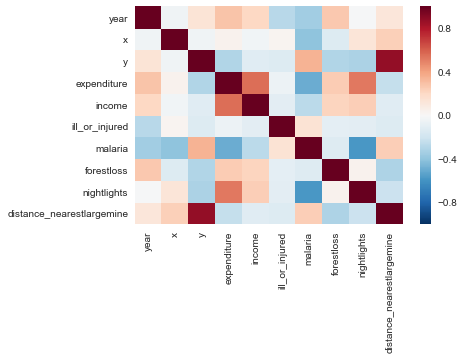

In [4]:
#Correlation Matrix
corrdf = df.corr()
corr = (corrdf)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
# sns.title('Heatmap of Correlation Matrix')
corr

In [5]:
df.columns

Index(['year', 'x', 'y', 'expenditure', 'income', 'ill_or_injured', 'malaria',
       'forestloss', 'nightlights', 'distance_nearestlargemine'],
      dtype='object')

In [6]:
df.isnull().any()

year                          True
x                            False
y                            False
expenditure                   True
income                        True
ill_or_injured                True
malaria                       True
forestloss                    True
nightlights                   True
distance_nearestlargemine    False
dtype: bool

In [7]:
print(df[df["year"].isnull()])
#df.head()

      year        x        y  expenditure  income  ill_or_injured  malaria  \
1590   NaN  0.57982  7.83256          NaN     NaN             NaN      NaN   
1591   NaN  0.63470  6.02610          NaN     NaN             NaN      NaN   
1592   NaN  0.70544  5.84189          NaN     NaN             NaN      NaN   

      forestloss  nightlights  distance_nearestlargemine  
1590         NaN          NaN                 185603.190  
1591         NaN          NaN                  86881.336  
1592         NaN          NaN                 102678.480  


Since these three rows do not contain any economic and health data that we want to combine with small scale mining we drop these rows.

In [8]:
df.describe()

,year,x,y,expenditure,income,ill_or_injured,malaria,forestloss,nightlights,distance_nearestlargemine
count,1590.000000,1593.000000,1593.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1593.000000
mean,1685.407547,-1.113771,7.386736,1144.462657,1618.409123,0.192963,0.414778,0.003691,5.440169,104754.233128
std,718.072947,1.033284,1.894350,863.878698,2776.352511,0.121365,0.117298,0.006236,11.395047,99576.183657
min,98.000000,-3.203450,4.761240,80.285172,-35.787189,0.000000,0.091799,0.000000,0.000000,676.799930
25%,2005.000000,-1.901096,5.942012,547.153865,350.336130,0.101038,0.348880,0.000037,0.046607,26915.229000
50%,2012.000000,-1.012990,6.701314,907.142060,718.863950,0.171429,0.422190,0.000898,0.855386,63871.512000
75%,2013.000000,-0.265932,8.779180,1473.797550,1879.633350,0.267536,0.501839,0.004506,3.596005,175418.700000
max,2013.000000,1.192945,11.127133,7677.353500,61162.129000,0.628571,0.683214,0.072279,60.936462,369073.840000


Showing Illness and Malaria over time

In [11]:
df = df[df['year']>0]

In [12]:
df2['newyear'] = np.where(df['year']<2000, df['year']+1900, df['year'])

In [13]:
df2 = df2.drop(['year'], axis=1)
print(df2)

             x          y  expenditure        income  ill_or_injured  \
0    -3.056220   6.861440    679.86713    344.251040        0.295238   
1    -2.944620   6.352410    545.13544    514.467100        0.297297   
2    -2.854470   7.749370    709.71167    511.725740        0.265823   
3    -2.818800  10.724200    246.44479     85.705086        0.173913   
4    -2.815250   6.888330   1034.02030    826.393370        0.125000   
5    -2.809280   5.031860    496.52213    248.082030        0.191011   
6    -2.803680   7.202270    555.46472    655.355960        0.156863   
7    -2.780600  10.580760    288.18698    109.662430        0.115385   
8    -2.772900   6.443140    564.46698    363.907230        0.285714   
9    -2.763050   7.254770    426.75067    276.351010        0.046154   
10   -2.715060   9.811459    234.82852    186.739670        0.427083   
11   -2.701830   7.297110    951.84125    627.467470        0.103448   
12   -2.701680  10.538400    504.82559    298.682160        0.18

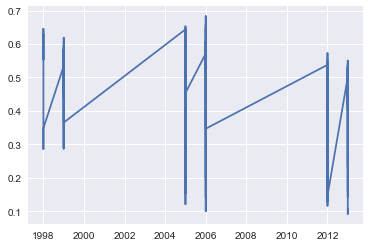

In [15]:
plt.plot(df2["newyear"], df["malaria"], '-')

In [16]:
df2.head()

,x,y,expenditure,income,ill_or_injured,malaria,forestloss,nightlights,distance_nearestlargemine,newyear
0,-3.05622,6.86144,679.86713,344.251040,0.295238,0.627282,0.0,0.00000,76552.820,1998.0
1,-2.94462,6.35241,545.13544,514.467100,0.297297,0.628550,0.0,0.34153,69400.570,1998.0
2,-2.85447,7.74937,709.71167,511.725740,0.265823,0.603990,0.0,0.00000,47839.813,1998.0
3,-2.81880,10.72420,246.44479,85.705086,0.173913,0.553067,0.0,0.00000,245310.780,1998.0
4,-2.81525,6.88833,1034.02030,826.393370,0.125000,0.620716,0.0,0.00000,49765.992,1998.0


In [19]:
df2[['newyear','malaria']].groupby(['newyear'], as_index=False).mean().sort_values(by='malaria', ascending=False)
# display as line chart
#plt.plot()

,newyear,malaria
0,1998.0,0.508567
1,1999.0,0.487190
2,2005.0,0.437631
3,2006.0,0.423596
4,2012.0,0.379301
5,2013.0,0.375753


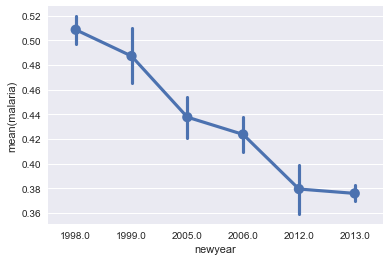

In [21]:
sns.pointplot(x='newyear',y='malaria',data=df2)

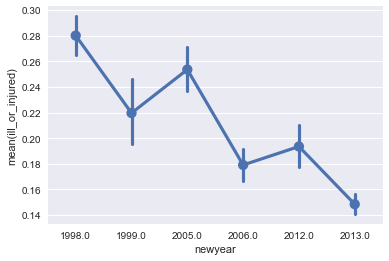

In [23]:
sns.pointplot(x='newyear',y='ill_or_injured',data=df2)

In [25]:
# takes too long
grid = sns.FacetGrid(df2, row='malaria', col='newyear')
grid.map(plt.hist, 'distance_nearestlargemine', bins=4)
grid.add_legend()

KeyboardInterrupt: 

ValueError: Image size of 1296x337392 pixels is too large. It must be less than 2^16 in each direction.

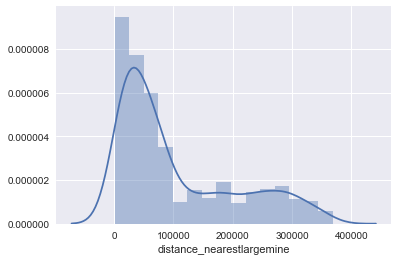

In [29]:
# Histogram
var = 'distance_nearestlargemine' # can also be malaria
sns.distplot(df2[var])

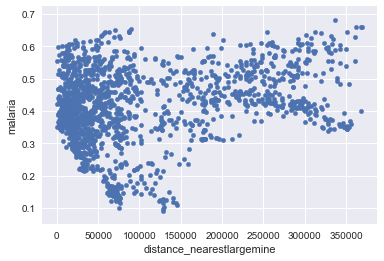

In [31]:
# scatter plot
xvar = 'distance_nearestlargemine'
yvar = 'malaria'
data = pd.concat([df2[yvar], df2[xvar]], axis=1)
data.plot.scatter(x=xvar, y=yvar)

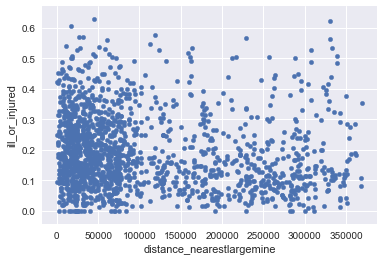

In [33]:
# scatter plot
xvar = 'distance_nearestlargemine'
yvar = 'ill_or_injured'
data = pd.concat([df2[yvar], df2[xvar]], axis=1)
data.plot.scatter(x=xvar, y=yvar)

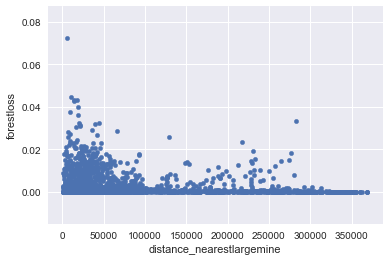

In [34]:
# scatter plot
xvar = 'distance_nearestlargemine'
yvar = 'forestloss'
data = pd.concat([df2[yvar], df2[xvar]], axis=1)
data.plot.scatter(x=xvar, y=yvar)

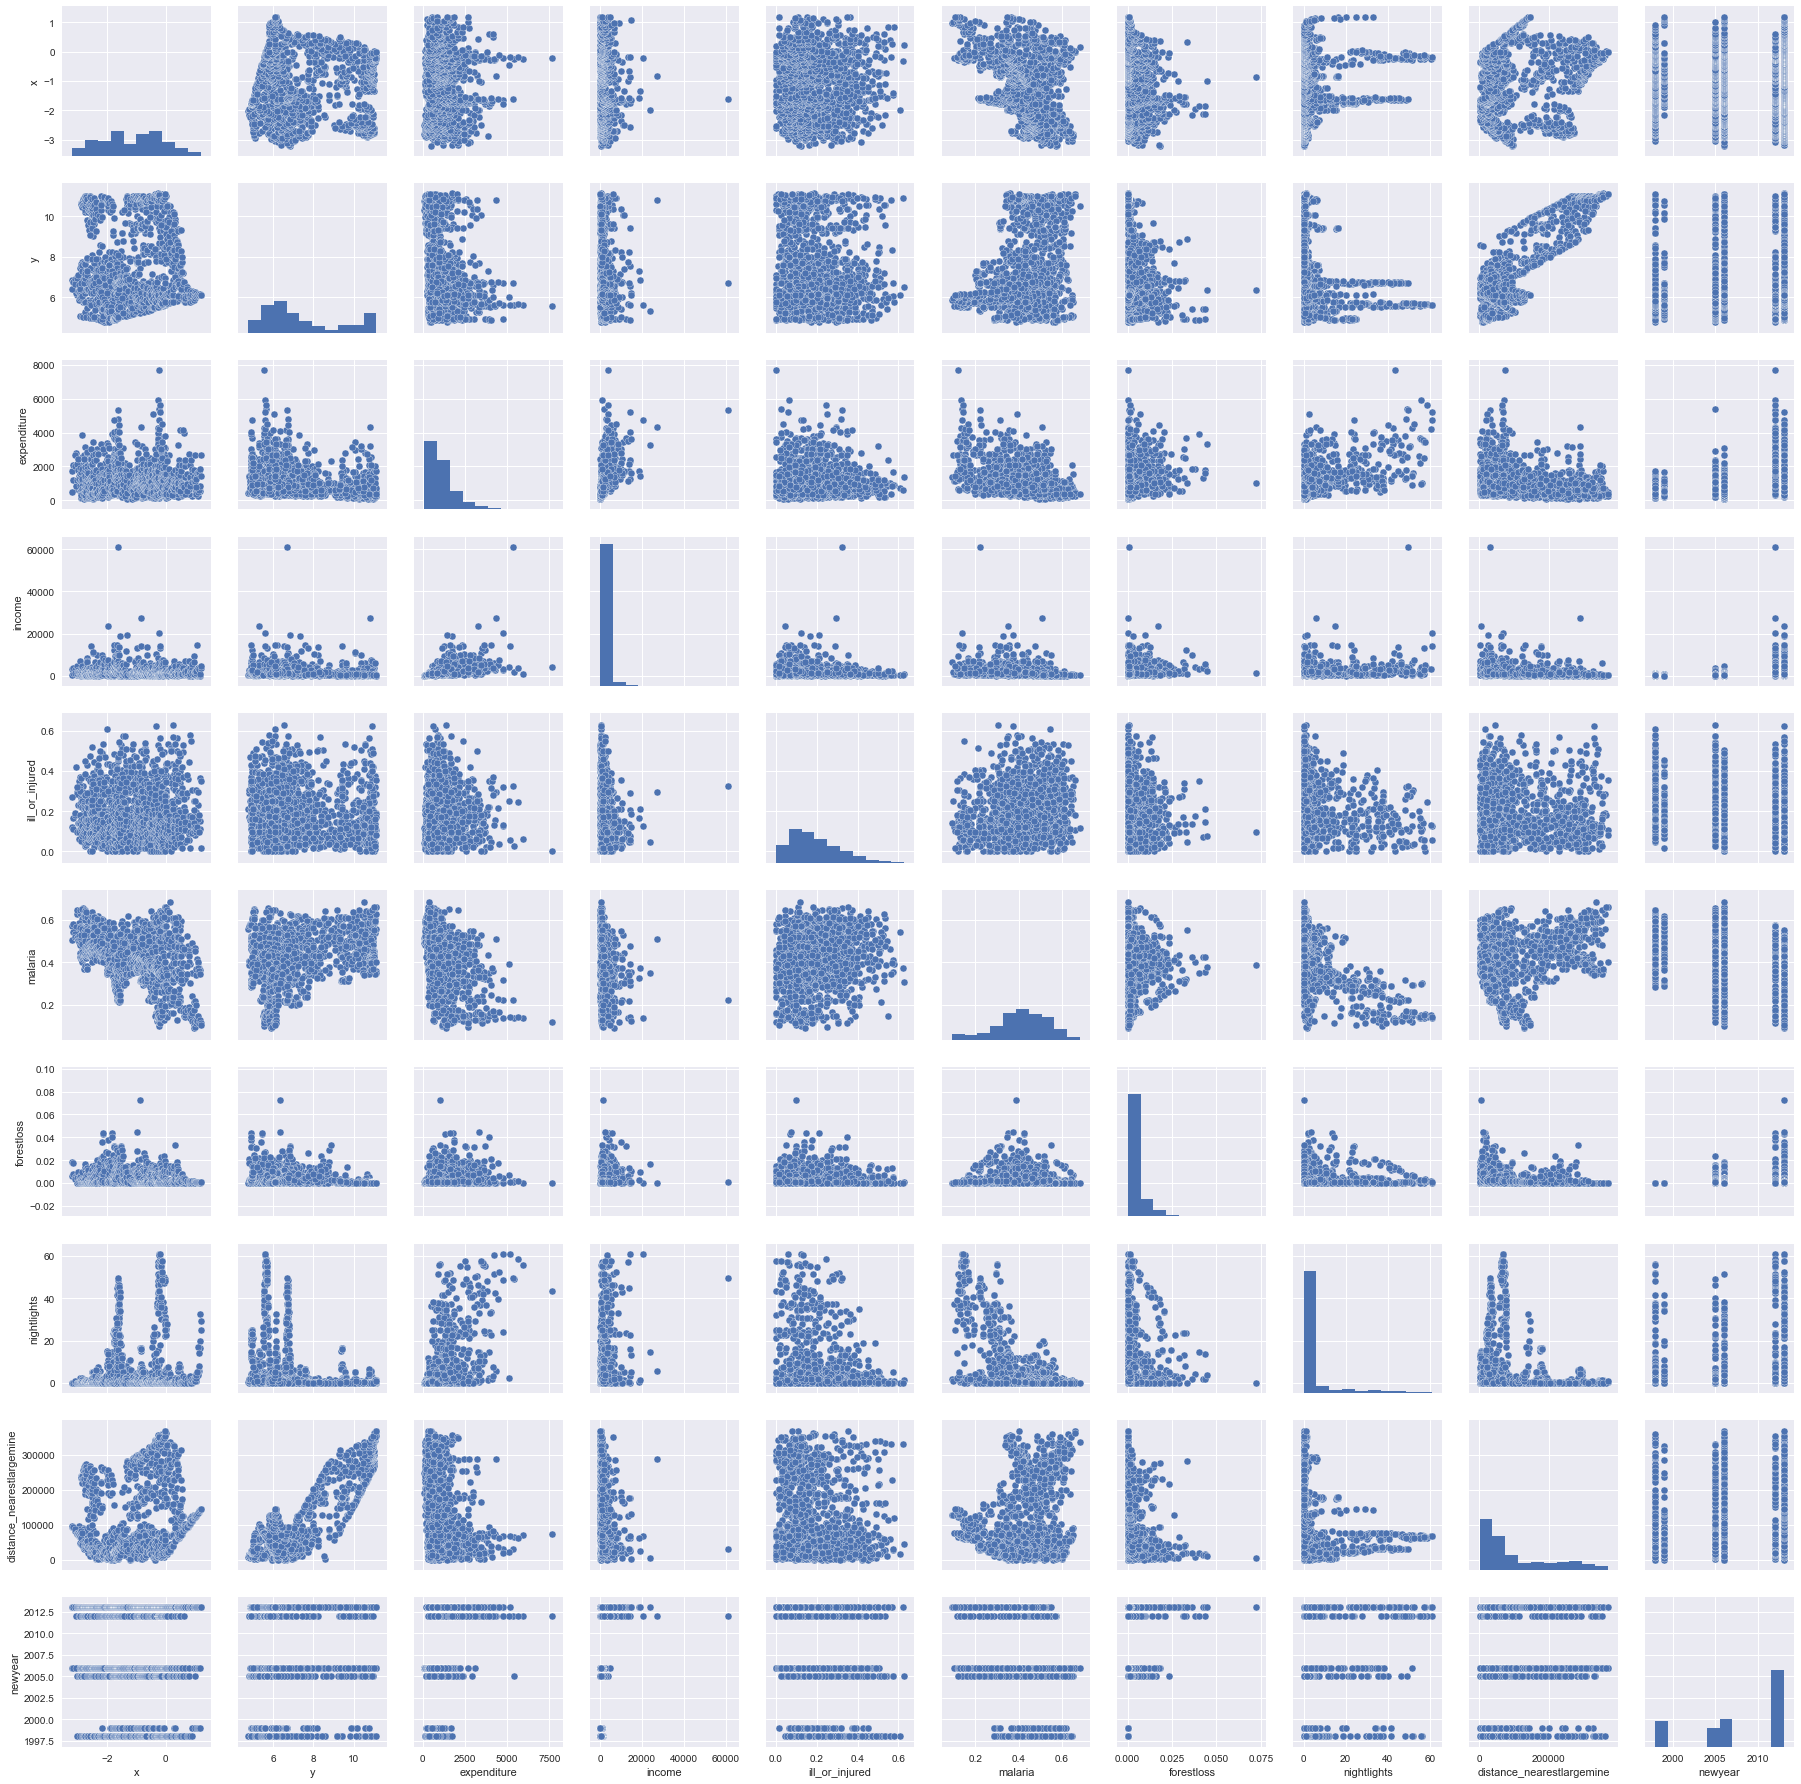

In [38]:
# scatterplot
sns.set()
cols = list(df2)
sns.pairplot(df2[cols], size=2.5)
plt.show()